In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m, n, r = 200, 201, 2

U = np.random.randn(m, r) * .5
Vt = np.random.randn(r, n) * .5

U /= np.linalg.norm(U, axis=0)
Vt /= np.linalg.norm(Vt, axis=1, keepdims=True)

U[:, 0] = np.sort(U[:, 0])
Vt[0] = np.sort(Vt[0])

Xr = np.exp(np.dot(U, Vt))
X = np.random.poisson(Xr)
print(Xr.min())

0.9465892151107281


In [3]:
from lvl.factor_models import PoissonMF

model = PoissonMF(n_components=r, tol=1e-8)
model.fit(X)

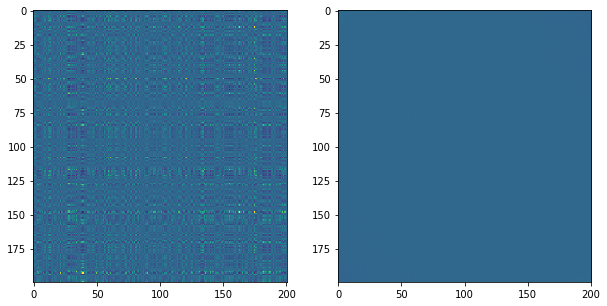

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(model.predict(), aspect='auto', interpolation='none', clim=(0, 3))
axes[1].imshow(Xr, aspect='auto', interpolation='none', clim=(0, 3))

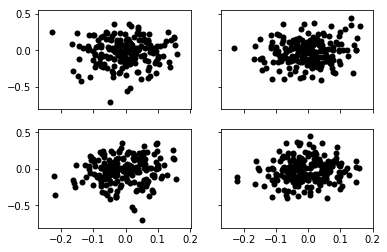

In [5]:
import itertools
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i, j in itertools.product(range(r), range(r)):
    axes[i, j].scatter(U[:, i], model.factors[0][:, j], lw=0, color='k')